In [ ]:
import pandas as pd
# Procesamiento matemático
import numpy as np
# Gráficas
import matplotlib.pyplot as plt
# Métodos de imputacion
import sklearn.impute as si
# Visualización de datos faltantes
import missingno as msno
# Control de datos faltantes categoricos
import sklearn.preprocessing as sp
# Gráfico de cajas y bigotes
import seaborn as sns

In [ ]:
from google.colab import files
# Abrir fichero donde se encuentran los datos que quiero leer
files.upload()

Saving EXAMEN.xlsx to EXAMEN.xlsx


{'EXAMEN.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00OS;\xcc}\x01\x00\x008\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [63]:
df=pd.read_excel('EXAMEN.xlsx')

In [64]:
df.head()

,id,Fecha,programa,sexo,edad,tricipital,IMC,% grasa,masa grasa,masa magra,talla,peso,ccintura,Pligue SE,TMB,GLIC,tCol,TG,HDL-Col,LDL-Col,HCY-SPIN
0,1,10118,comunicación,f,19,24.0,25.5,29.4,17.8,42.7,154.0,60.5,77.5,28.0,1432.0,51.0,197.0,299.0,38.0,119.0,12.05
1,2,10119,medicina,m,22,7.0,20.6,13.0,7.7,51.2,169.0,58.9,79.0,14.0,1576.0,61.0,144.0,82.0,53.0,74.0,14.55
2,3,10120,medicina,m,20,NaN,20.8,10.7,6.8,56.9,175.0,63.7,77.5,13.0,1685.0,65.0,186.0,84.0,52.0,118.0,11.73
3,4,10218,derecho,m,21,5.0,19.1,8.5,5.0,53.5,175.0,58.5,71.0,9.0,1607.0,73.0,179.0,113.0,59.0,97.0,11.75
4,5,10219,derecho,m,22,10.0,21.2,NaN,6.3,57.1,173.0,63.4,73.0,11.0,NaN,56.0,NaN,202.0,40.0,119.0,16.04


In [65]:
dfcopia = df.copy()

In [66]:
dfcopia['Fecha'] = dfcopia['Fecha'].astype('string')
dfcopia['Fecha'] = dfcopia['Fecha'].str.zfill(6)
dfcopia['Fecha']= pd.to_datetime(dfcopia['Fecha'],format='%d%m%y')

In [67]:
dfcopia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          164 non-null    int64         
 1   Fecha       164 non-null    datetime64[ns]
 2   programa    161 non-null    object        
 3   sexo        160 non-null    object        
 4   edad        164 non-null    int64         
 5   tricipital  162 non-null    float64       
 6   IMC         164 non-null    float64       
 7   % grasa     162 non-null    float64       
 8   masa grasa  163 non-null    float64       
 9   masa magra  164 non-null    float64       
 10  talla       163 non-null    float64       
 11  peso        164 non-null    float64       
 12  ccintura    163 non-null    float64       
 13  Pligue SE   163 non-null    float64       
 14  TMB         161 non-null    float64       
 15  GLIC        163 non-null    float64       
 16  tCol        161 non-null  

{'boxes': [<matplotlib.lines.Line2D at 0x7ff6a8a076a0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff6a8a170b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff6a8a17b38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff6a8a177b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff6a8a079b0>,
  <matplotlib.lines.Line2D at 0x7ff6a8a07cf8>]}

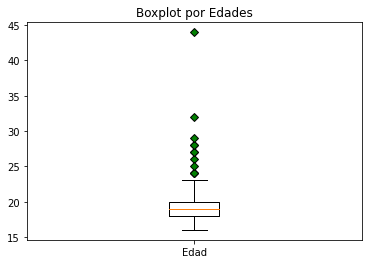

In [45]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Edades')
ax.boxplot(dfcopia["edad"], flierprops=green_diamond, labels=['Edad'])

In [48]:

!pip install pyod
 
from pyod.models.knn import KNN
import pandas as pd
 

In [70]:
import datetime as dt

start_date = "2020-01-01"
end_date = "2020-12-07"

after_start_date = dfcopia["Fecha"] >= start_date
before_end_date = dfcopia["Fecha"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = dfcopia.loc[between_two_dates]


X = pd.DataFrame(filtered_dates['edad'])
 
clf = KNN(contamination=0.1)
clf.fit(X)
y_pred = clf.predict(X)
X[y_pred == 1]

,edad
127,28


In [71]:
dfcopia.isna().sum()

id            0
Fecha         0
programa      3
sexo          4
edad          0
tricipital    2
IMC           0
% grasa       2
masa grasa    1
masa magra    0
talla         1
peso          0
ccintura      1
Pligue SE     1
TMB           3
GLIC          1
tCol          3
TG            1
HDL-Col       2
LDL-Col       1
HCY-SPIN      2
dtype: int64

In [78]:
df2 = dfcopia.copy()
enc = sp.OrdinalEncoder()

sexo = df2['sexo']
sexo_nn = sexo[sexo.notnull()]

r_v = sexo_nn.values.reshape(-1, 1)

# Ordinally encode reshaped_vals
e_v = enc.fit_transform(r_v)

# Assign back encoded values to non-null values of ambience in ser
df2.loc[sexo.notnull(), 'sexo'] = np.squeeze(e_v)

df2.loc[df2['sexo']>2,'sexo']='NaN'
df2.head()

,id,Fecha,programa,sexo,edad,tricipital,IMC,% grasa,masa grasa,masa magra,talla,peso,ccintura,Pligue SE,TMB,GLIC,tCol,TG,HDL-Col,LDL-Col,HCY-SPIN
0,1,2018-01-01,comunicación,0,19,24.0,25.5,29.4,17.8,42.7,154.0,60.5,77.5,28.0,1432.0,51.0,197.0,299.0,38.0,119.0,12.05
1,2,2019-01-01,medicina,1,22,7.0,20.6,13.0,7.7,51.2,169.0,58.9,79.0,14.0,1576.0,61.0,144.0,82.0,53.0,74.0,14.55
2,3,2020-01-01,medicina,1,20,NaN,20.8,10.7,6.8,56.9,175.0,63.7,77.5,13.0,1685.0,65.0,186.0,84.0,52.0,118.0,11.73
3,4,2018-02-01,derecho,1,21,5.0,19.1,8.5,5.0,53.5,175.0,58.5,71.0,9.0,1607.0,73.0,179.0,113.0,59.0,97.0,11.75
4,5,2019-02-01,derecho,1,22,10.0,21.2,NaN,6.3,57.1,173.0,63.4,73.0,11.0,NaN,56.0,NaN,202.0,40.0,119.0,16.04


In [82]:
enc = sp.OrdinalEncoder() 
programa = df2['programa'] 
programa_nn = programa[programa.notnull()] 

r_v = programa_nn.values.reshape(-1, 1) 

# Ordinally encode reshaped_vals 
e_v = enc.fit_transform(r_v) 

# Assign back encoded values to non-null values of ambience in ser 
df2.loc[programa.notnull(), 'programa'] = np.squeeze(e_v) 

#df2.loc[df2['programa']>7,'programa']='NaN' 
df2.head()
#df2.info()

,id,Fecha,programa,sexo,edad,tricipital,IMC,% grasa,masa grasa,masa magra,talla,peso,ccintura,Pligue SE,TMB,GLIC,tCol,TG,HDL-Col,LDL-Col,HCY-SPIN
0,1,2018-01-01,3,0,19,24.0,25.5,29.4,17.8,42.7,154.0,60.5,77.5,28.0,1432.0,51.0,197.0,299.0,38.0,119.0,12.05
1,2,2019-01-01,6,1,22,7.0,20.6,13.0,7.7,51.2,169.0,58.9,79.0,14.0,1576.0,61.0,144.0,82.0,53.0,74.0,14.55
2,3,2020-01-01,6,1,20,NaN,20.8,10.7,6.8,56.9,175.0,63.7,77.5,13.0,1685.0,65.0,186.0,84.0,52.0,118.0,11.73
3,4,2018-02-01,4,1,21,5.0,19.1,8.5,5.0,53.5,175.0,58.5,71.0,9.0,1607.0,73.0,179.0,113.0,59.0,97.0,11.75
4,5,2019-02-01,4,1,22,10.0,21.2,NaN,6.3,57.1,173.0,63.4,73.0,11.0,NaN,56.0,NaN,202.0,40.0,119.0,16.04


In [83]:
from fancyimpute import KNN
set_knn = df2.copy(deep=True)
set_knn=set_knn.drop(['Fecha'], axis=1)
sef=df2[['id','Fecha']]
knt = KNN()
set_knn.iloc[:, :] = knt.fit_transform(set_knn)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Imputing row 1/164 with 0 missing, elapsed time: 0.007
Imputing row 101/164 with 0 missing, elapsed time: 0.009


In [84]:
seo=pd.merge(set_knn,sef, on='id')
seo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          164 non-null    float64       
 1   programa    164 non-null    float64       
 2   sexo        164 non-null    float64       
 3   edad        164 non-null    float64       
 4   tricipital  164 non-null    float64       
 5   IMC         164 non-null    float64       
 6   % grasa     164 non-null    float64       
 7   masa grasa  164 non-null    float64       
 8   masa magra  164 non-null    float64       
 9   talla       164 non-null    float64       
 10  peso        164 non-null    float64       
 11  ccintura    164 non-null    float64       
 12  Pligue SE   164 non-null    float64       
 13  TMB         164 non-null    float64       
 14  GLIC        164 non-null    float64       
 15  tCol        164 non-null    float64       
 16  TG          164 non-null  

In [85]:
from google.colab import files


In [86]:
seo.to_csv('df.csv') 

files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>